# Black Scholes formula


Black-Scholes formula for European Put option price

\begin{equation}
  P_t = K{\rm e}^{-r(T-t)}\Phi\left(-\frac{\ln\left(\frac{S_t}{K}\right)+\left(r-\frac{1}{2}\sigma^2\right)(T-t)}{\sigma\sqrt{T-t}}\right)
-S_t\Phi\left( -\frac{\ln\left(\frac{S_t}{K}\right)+\left(r+\frac{1}{2}\sigma^2\right)(T-t)}{\sigma\sqrt{T-t}}\right)
\end{equation}

Black-Scholes formula for European Call option price
\begin{equation}
C_t = S_t\Phi\left( \frac{\ln\left(\frac{S_t}{K}\right)+\left(r+\frac{1}{2}\sigma^2\right)(T-t)}{\sigma\sqrt{T-t}}\right)
-K{\rm e}^{-r(T-t)}\Phi\left(\frac{\ln\left(\frac{S_t}{K}\right)+\left(r-\frac{1}{2}\sigma^2\right)(T-t)}{\sigma\sqrt{T-t}}\right)
\end{equation}

R code to generate prices using direct implementation of
Black-Scholes formula.

See commented lines to run with call or put option.





In [1]:
import numpy as np
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

In [2]:
def BlackScholes(S, K, T, r, sigma, option = 'call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

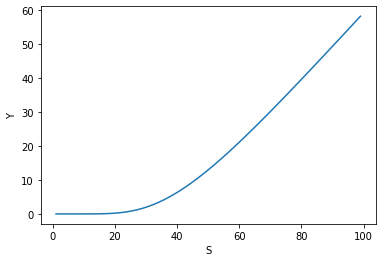

In [9]:
import matplotlib.pyplot as plt #Matplotlib for pythons basic plotting
import plotly


S = np.arange(1, 100, 1)
CallVal = BlackScholes(S, 50, 2, 0.1, 0.3, 'call')
plt.plot(S, CallVal)
plt.xlabel('S')
plt.ylabel('CallVal')
plt.show()

#### Testing Black-Scholes against real data!

From Yahoo-Finance-Options.ipynb: Maturity in 180 days Strike 570 Call Market Price 28.875

From Yahoo-Finance-Stocks.ipynb: Price today NFLX 469.9599914550781, Annualized daily volatility from 2019-09-03 to 2020-09-18 for nflx is 43.74%

From US-Treasury: rate=0.13

In [11]:
currentstock=469.9599914550781
strike=570
maturity=180/365.
vol=0.44
rate=0.13

BlackScholes(S=currentstock, K=570, T=maturity, r=rate, sigma=vol, option='call')

Exercise: What volatility would need to go into the BS model to make the prices match?
